In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
data=pd.read_csv("heart.csv")
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
info

['age',
 '1: male, 0: female',
 'chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic',
 'resting blood pressure',
 ' serum cholestoral in mg/dl',
 'fasting blood sugar > 120 mg/dl',
 'resting electrocardiographic results (values 0,1,2)',
 ' maximum heart rate achieved',
 'exercise induced angina',
 'oldpeak = ST depression induced by exercise relative to rest',
 'the slope of the peak exercise ST segment',
 'number of major vessels (0-3) colored by flourosopy',
 'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect']

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### check for the irregularities in data

In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### No Null values present

<AxesSubplot:>

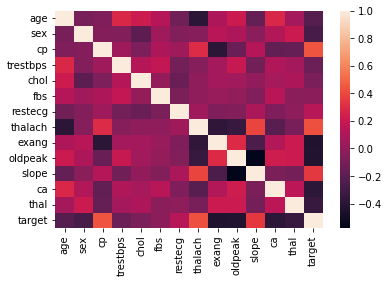

In [8]:
sns.heatmap(data=data.corr())

In [9]:
data.corr()['target'].abs().sort_values()

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64

###  fbs has low correlation with the target

In [10]:
data['target'].unique()

array([1, 0], dtype=int64)

### 0 mean No heart disease detected 1 means disease detected

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

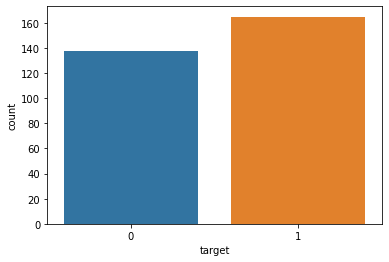

In [11]:
target=data['target']
sns.countplot(target)

In [12]:
data['sex'].unique()

array([1, 0], dtype=int64)

### Assuming 1 is male and 0 is female

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

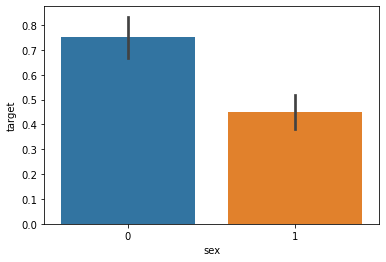

In [13]:
sns.barplot(data['sex'],target)

### Females are more likely to have a heart related problem according to the data given

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

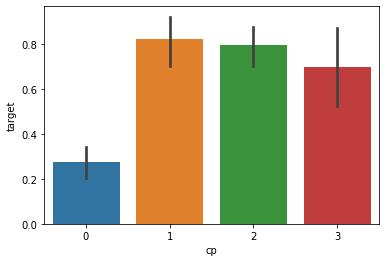

In [14]:
sns.barplot(data['cp'],target)

### people with typical angina are less likely to have a heart related problem

In [15]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

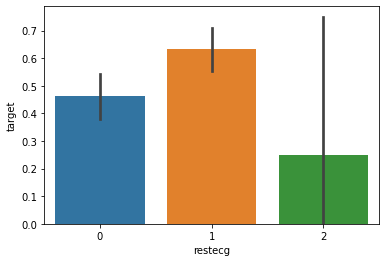

In [16]:
sns.barplot(data['restecg'],target)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

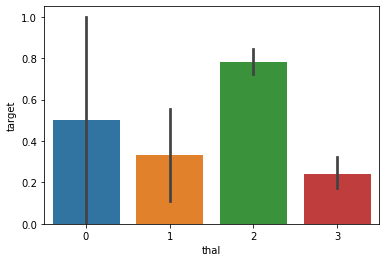

In [17]:
sns.barplot(data['thal'],target)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

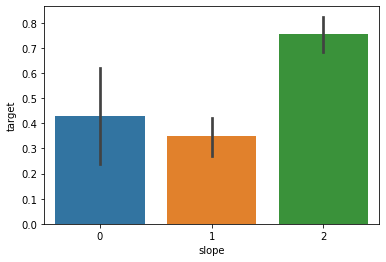

In [18]:
sns.barplot(data['slope'],target)

### Splitting the Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Symptoms=data.drop("target",axis=1)
Predictions=data["target"]

In [63]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Symptoms,Predictions,test_size=0.2,random_state=0)

In [64]:
Xtrain.shape

(242, 13)

In [65]:
Ytrain.shape

(242,)

In [66]:
Xtest.shape

(61, 13)

In [67]:
Ytest.shape

(61,)

### Model Selection


In [68]:
from sklearn.metrics import accuracy_score,f1_score

### SVM

In [69]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
sv.fit(Xtrain,Ytrain)

SVC(kernel='linear')

In [70]:
print("F1 Score")
print(f1_score(sv.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(sv.predict(Xtest),Ytest))

F1 Score
0.8450704225352113
Accuracy Score
0.819672131147541


### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
DS=DecisionTreeClassifier(random_state=0)
DS.fit(Xtrain,Ytrain)

DecisionTreeClassifier(random_state=0)

In [73]:
print("F1 Score")
print(f1_score(DS.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(DS.predict(Xtest),Ytest))

F1 Score
0.7999999999999999
Accuracy Score
0.7868852459016393


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=0)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(random_state=0)

In [75]:
print("F1 Score")
print(f1_score(RF.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(RF.predict(Xtest),Ytest))

F1 Score
0.8955223880597014
Accuracy Score
0.8852459016393442


### KNN


In [76]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=16)
KNN.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=16)

In [77]:
print("F1 Score")
print(f1_score(KNN.predict(Xtest),Ytest))
print("Accuracy Score")
print(accuracy_score(KNN.predict(Xtest),Ytest))

F1 Score
0.6666666666666667
Accuracy Score
0.6721311475409836


### Neural Network

In [78]:
from keras.models import Sequential
from keras.layers import Dense

In [79]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [80]:
model.fit(Xtrain,Ytrain,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 76.8393 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 70.9368 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 65.3905 - accuracy: 0.4587
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 59.6867 - accuracy: 0.4587
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 54.5040 - accuracy: 0.4587
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 49.1430 - accuracy: 0.4587
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 43.7792 - accuracy: 0.4587
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 38.6569 - accuracy: 0.4587
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 33.3087 - accuracy: 0.4587
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 27.8150 - accuracy: 0.4587
Epoch 11/300
8/8 [=

8/8 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.7273
Epoch 85/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6942
Epoch 86/300
8/8 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.7314
Epoch 87/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.7314
Epoch 88/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7397
Epoch 89/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7521
Epoch 90/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7231
Epoch 91/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7479
Epoch 92/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7107
Epoch 93/300
8/8 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7479
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8099
Epoch 168/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8017
Epoch 169/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8223
Epoch 170/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8099
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8140
Epoch 172/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8223
Epoch 173/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8347
Epoch 174/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.7975
Epoch 175/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8306
Epoch 176/300
8/8 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8264
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 7ms/step - loss: 0.3748 - accuracy: 0.8554
Epoch 250/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8347
Epoch 251/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8306
Epoch 252/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8306
Epoch 253/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8306
Epoch 254/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8430
Epoch 255/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8471
Epoch 256/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8388
Epoch 257/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8306
Epoch 258/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3888 - accuracy: 0.8182
Epoch 259/300
8/8 [=====

In [81]:
Ypredd=model.predict(Xtest)


2/2 [==============================] - 0s 4ms/step


In [82]:
rounded = [round(x[0]) for x in Ypredd]

Ypredd = rounded
Ypredd

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [83]:
print("F1 Score")
print(f1_score(Ypredd,Ytest))
print("Accuracy Score")
print(accuracy_score(Ypredd,Ytest))

F1 Score
0.8285714285714286
Accuracy Score
0.8032786885245902


In [94]:
from sklearn.metrics import mean_squared_error
mse=[]
mse.append(mean_squared_error(sv.predict(Xtest),Ytest)*100)
mse.append(mean_squared_error(KNN.predict(Xtest),Ytest)*100)
mse.append(mean_squared_error(DS.predict(Xtest),Ytest)*100)
mse.append(mean_squared_error(RF.predict(Xtest),Ytest)*100)
mse.append(mean_squared_error(Ypredd,Ytest)*100)
print (mse)

[18.0327868852459, 32.78688524590164, 21.311475409836063, 11.475409836065573, 19.672131147540984]


C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Mean Squared Error'>

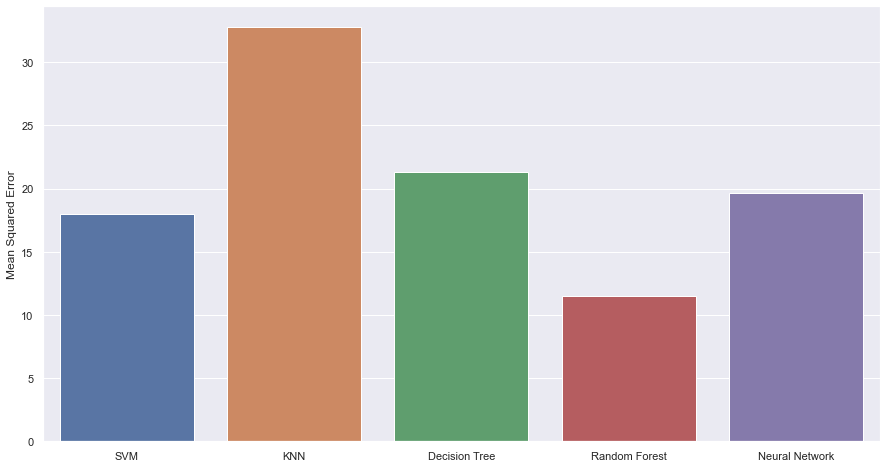

In [111]:
algo=["SVM","KNN","Decision Tree","Random Forest","Neural Network"]
sns.set(rc={'figure.figsize':(15,8)})
plt.pyplot.ylabel("Mean Squared Error")
sns.barplot(algo,mse)

In [101]:
f1=[]
f1.append(f1_score(sv.predict(Xtest),Ytest)*100)
f1.append(f1_score(KNN.predict(Xtest),Ytest)*100)
f1.append(f1_score(DS.predict(Xtest),Ytest)*100)
f1.append(f1_score(RF.predict(Xtest),Ytest)*100)
f1.append(f1_score(Ypredd,Ytest)*100)


C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='F1 Score'>

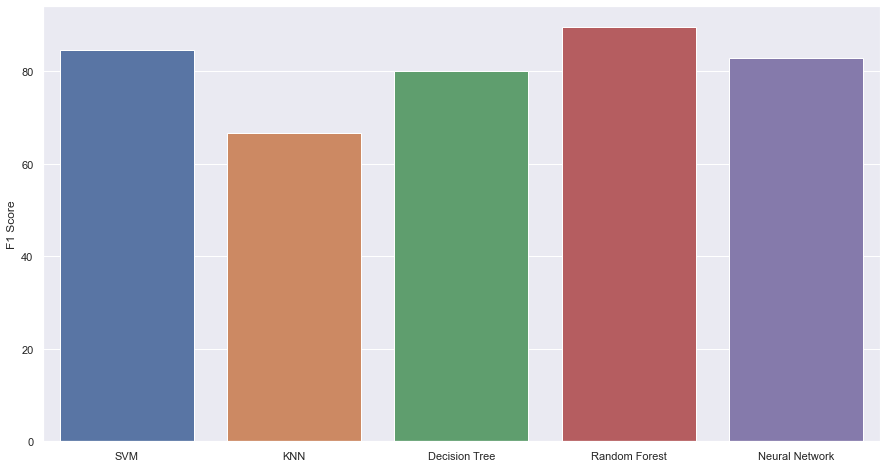

In [110]:
plt.pyplot.ylabel("F1 Score")
sns.barplot(algo,f1)

In [112]:
import pickle

In [114]:
pickle.dump(RF,open("RF.pkl","wb"))